In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from math import pi

from src.pre_processing import *

In [202]:
pd.set_option('display.max_columns', 999)

### Create subset and fill NaN's

In [214]:
subset = create_subset(public_df, cols_to_keep)

In [215]:
# fill with mode b/c of outliers (7.0 mode vs 7101 mean)
subset['responseLagSeconds'] = subset['responseLagSeconds'].fillna(subset['responseLagSeconds'].mode()[0])

# fill with 0's because categorical and we're dummifying trigger data anyways; and 0 is mode of workPilingUp

subset[['generalTrigger', 'specificTrigger', 'workPilingUp']] = subset[['generalTrigger', 'specificTrigger', 'workPilingUp']].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [216]:
# fill remaining null's with mean (dailyAlertNumber and tiredness) - they are close to the mode.

subset.fillna(subset.mean(), inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Dummify categoricals

In [217]:
subset.head()

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp
0,2044.0,2.0,0.500000,1,enjoyment,peaceful,0.50,wellbeing,exercise,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,7642.0,2.0,0.465404,1,fear,anxious,0.25,workStress,workload,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,1330.0,4.0,0.465404,1,anger,frustrated,0.25,socialStress,soChallenge,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,73.0,1.0,0.465404,1,enjoyment,happy,0.50,socialSupport,timeFamily,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,56.0,2.0,0.465404,1,enjoyment,happy,0.50,wellbeing,play,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [218]:
for col in cols_to_dummify:
    dummify_clustering(subset, col)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [219]:
subset.head()

,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,0,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,climateChange,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,globalPolitics,healthProblems,healthcare,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload
0,2044.0,2.0,0.500000,1,0.50,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7642.0,2.0,0.465404,1,0.25,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1330.0,4.0,0.465404,1,0.25,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,73.0,1.0,0.465404,1,0.50,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,56.0,2.0,0.465404,1,0.50,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Scale data and PCA

In [220]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(subset)
scaled_subset = scaler.transform(subset)


In [221]:
scaled_subset

array([[0.18360191, 0.25      , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.18409864, 0.25      , 0.46540388, ..., 0.        , 0.        ,
        1.        ],
       [0.18353855, 0.75      , 0.46540388, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18449164, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.75      , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.18342116, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [222]:
svd = TruncatedSVD(n_components=10, n_iter=7)
X_svd = svd.fit_transform(scaled_subset)

In [223]:
svd.singular_values_

array([129.61289475,  67.46710749,  45.19613333,  43.08881898,
        39.94621583,  38.4407414 ,  34.93315531,  33.75559517,
        32.89172628,  29.53570895])

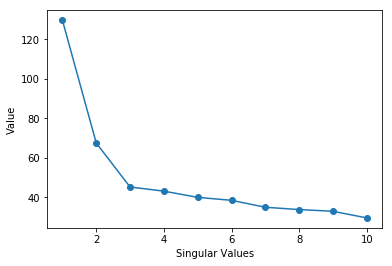

In [224]:
s = svd.singular_values_

x = [i+1 for i in range(len(s))]
plt.plot(x, s, marker='o')
plt.xlabel("Singular Values")
plt.ylabel("Value");

### kMeans Model after PCA

In [225]:
kmeans = KMeans(n_clusters=6)
predictions = kmeans.fit_predict(X_svd)
predictions

array([2, 0, 1, ..., 4, 5, 4], dtype=int32)

In [226]:
np.unique(predictions, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([1408, 1235, 1850,  854, 1011, 1068]))

In [228]:
silhouette_score(X_svd, predictions, metric='euclidean')

0.32866145020273774

In [47]:
silhouette_score(test_svd, predictions, metric='jaccard')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


nan

### Plot Silhouettes

In [229]:
X = X_svd
range_n_clusters = range(2,10)

# taken from sklearn
def plot_silhouette(df):
    
    for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1)
        fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.23658202903533526


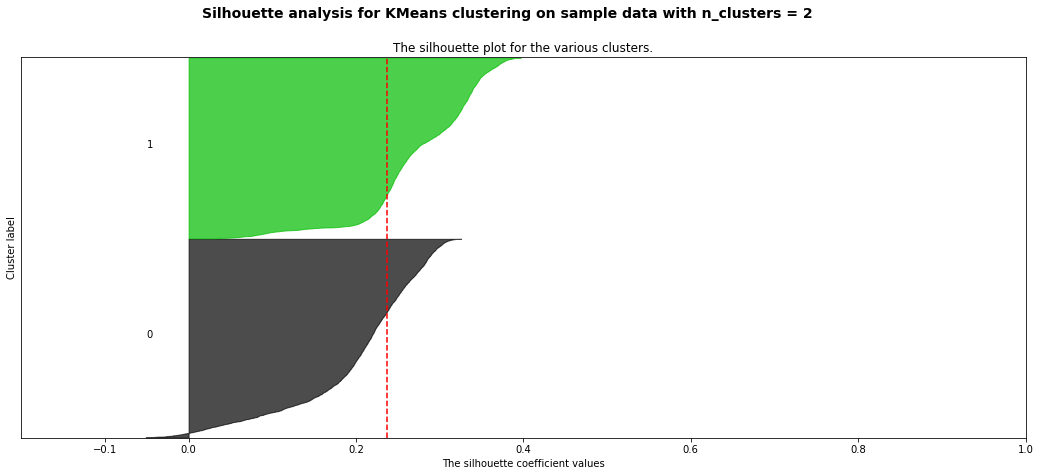

For n_clusters = 3 The average silhouette_score is : 0.24264722235904


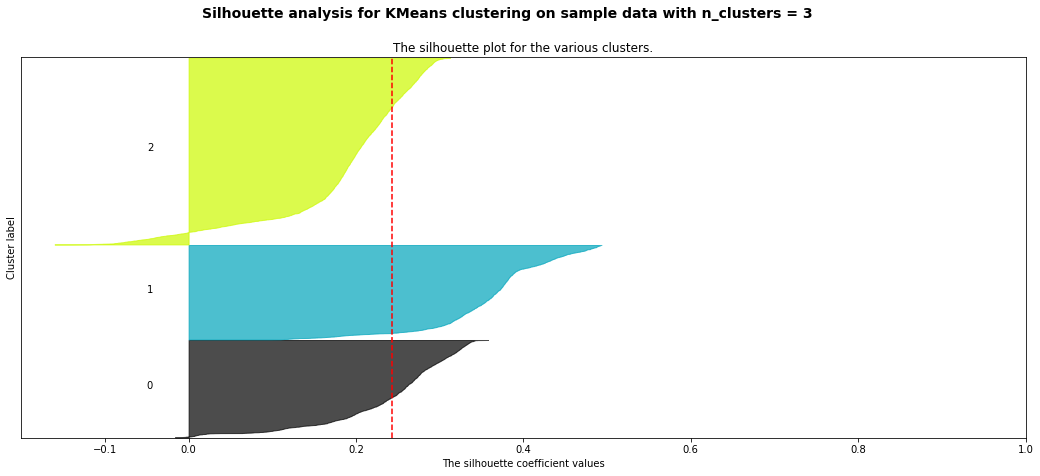

For n_clusters = 4 The average silhouette_score is : 0.26432805239359597


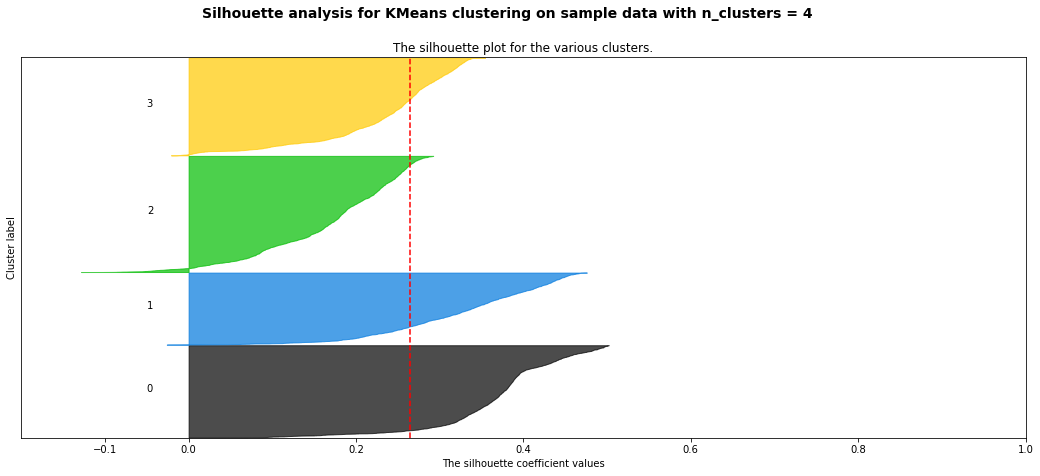

For n_clusters = 5 The average silhouette_score is : 0.3049928800084267


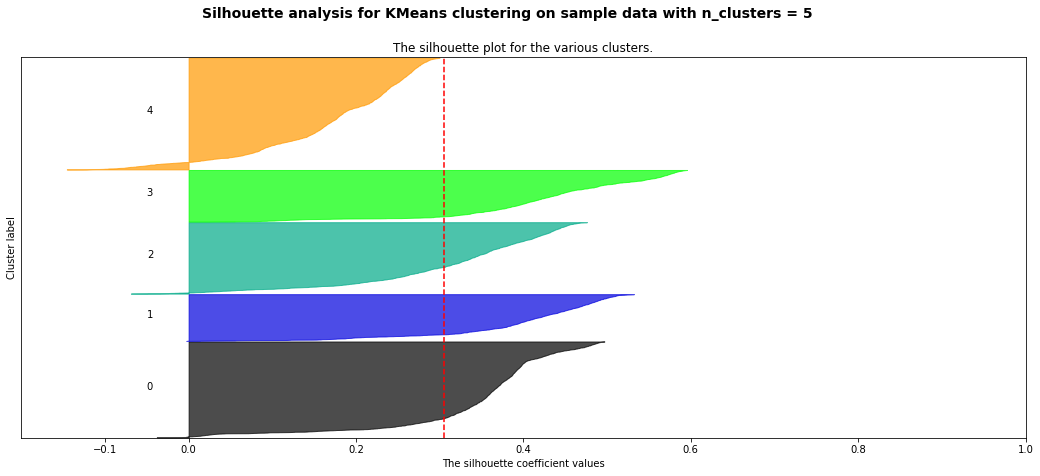

For n_clusters = 6 The average silhouette_score is : 0.32866145020273774


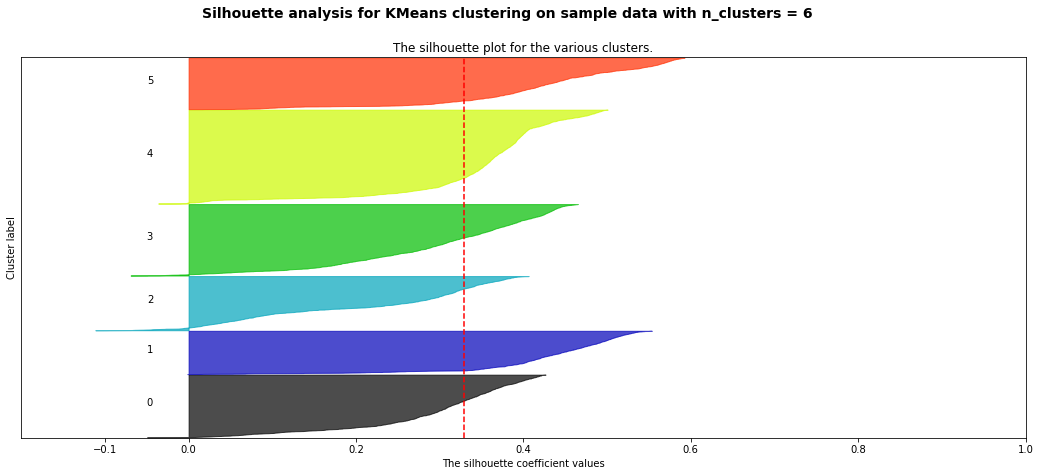

For n_clusters = 7 The average silhouette_score is : 0.32333114212484454


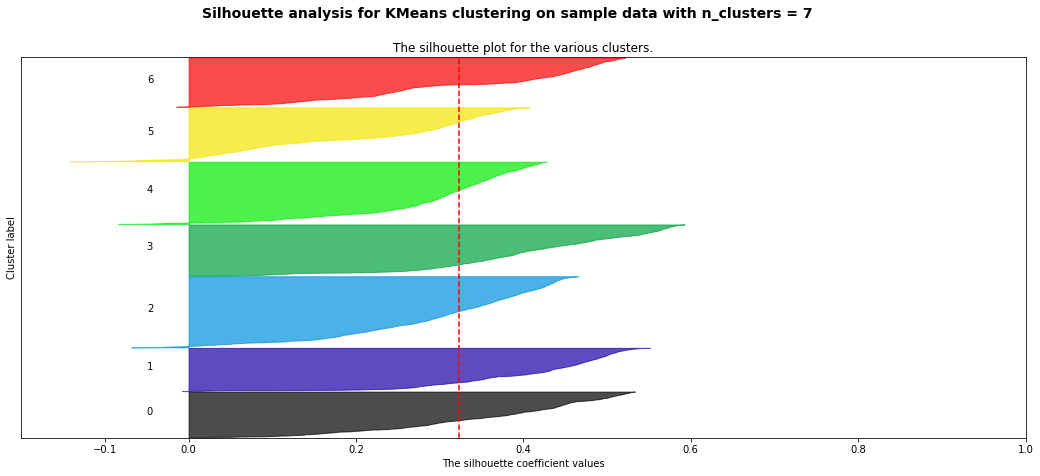

For n_clusters = 8 The average silhouette_score is : 0.32390344797896603


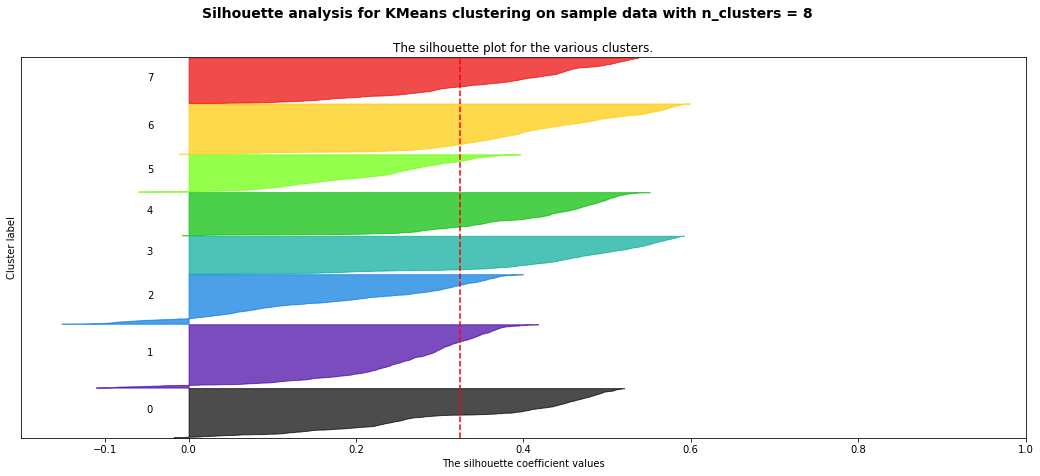

For n_clusters = 9 The average silhouette_score is : 0.3303009572380489


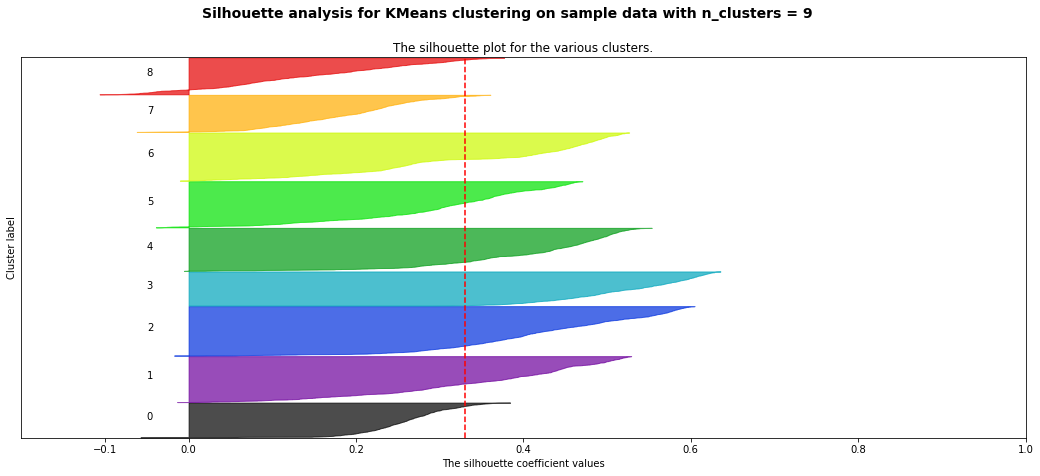

In [230]:
plot_silhouette(X)

### Check key features and add labels to dataframe

In [231]:
centroids = svd.inverse_transform(kmeans.cluster_centers_)
centroids[0]

array([ 1.75211771e-01,  2.54092128e-01,  4.33595102e-01,  7.50179499e-01,
        5.04302083e-01,  4.86891940e-01,  2.68974944e-02,  2.41833842e-02,
        2.80287845e-02,  3.11015028e-02,  3.20743616e-02,  5.48388845e-02,
        2.11355658e-03,  5.96552059e-03,  5.10419585e-02,  1.34431558e-02,
        5.05366623e-03,  1.60556215e-03,  3.93424070e-03,  8.59774591e-03,
        5.05547577e-03,  5.07738646e-03,  5.04957842e-01,  2.75133704e-02,
        1.73712930e-02,  1.74784620e-02,  1.02692202e-02,  1.78698515e-02,
        7.64308710e-03,  2.56970108e-02,  2.06055641e-02,  7.71082506e-03,
        5.87130116e-03,  1.06134840e-02,  0.00000000e+00,  3.17758064e-01,
       -1.86541737e-02,  1.25793311e-03,  9.59155761e-01,  4.22153255e-02,
       -3.29149965e-02,  4.67205746e-02,  2.27880597e-03, -7.50933789e-03,
        5.65761821e-01,  6.43193155e-03, -2.01322255e-02,  4.05266140e-03,
       -8.80000948e-04,  2.01075315e-03, -7.45844860e-03, -4.47713112e-03,
       -5.96519319e-03,  

In [232]:
top_centroids = np.argsort(centroids)[:, -1:-11:-1]

In [233]:
top_centroids

array([[38,  3, 44, 22,  4,  5, 66,  2, 35, 97],
       [36,  3,  4,  5,  2, 66, 22, 50, 35,  1],
       [64, 37,  3,  4,  2, 87, 57, 22,  5, 89],
       [63, 37,  3,  4,  2, 22, 51, 94, 95,  1],
       [65, 37,  3,  2,  4, 88, 22,  5, 48, 93],
       [ 3, 22, 40,  4,  5, 62, 35, 66,  2, 46]])

In [234]:
# for i in top_centroids:
subset[predictions == 0].iloc[:, top_centroids[0]].describe()

,fear,feelingEmotion,anxious,intensity,bodySensationIntensity,workStress,tiredness,workPilingUp,workload
count,1408.00000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000
mean,0.99929,0.746449,0.530540,0.503374,0.462713,0.480824,0.433667,1.242188,0.265625
std,0.02665,0.435198,0.499244,0.234007,0.291788,0.499810,0.224228,1.280884,0.441822
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.000000
50%,1.00000,1.000000,1.000000,0.500000,0.500000,0.000000,0.465404,1.000000,0.000000
75%,1.00000,1.000000,1.000000,0.750000,0.750000,1.000000,0.500000,2.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [235]:
subset[predictions == 1].iloc[:, top_centroids[1]].describe()

,anger,feelingEmotion,intensity,bodySensationIntensity,tiredness,workStress,frustrated,workPilingUp,dailyAlertNumber
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,0.995951,0.708502,0.525506,0.409514,0.421952,0.416194,0.312551,1.091498,2.085735
std,0.063525,0.454636,0.240621,0.316453,0.224348,0.493126,0.463721,1.252117,0.997521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.500000,0.500000,0.465404,0.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,0.750000,0.750000,0.500000,1.000000,1.000000,2.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000


In [236]:
subset[predictions == 1].iloc[:, top_centroids[1]]['emotionDuration'].value_counts()

5     296
15    272
90    245
30    198
1     117
60    107
Name: emotionDuration, dtype: int64

In [237]:
subset[predictions == 1].iloc[:, top_centroids[1]].head()

,anger,feelingEmotion,intensity,bodySensationIntensity,tiredness,workStress,emotionDuration,frustrated,workPilingUp,dailyAlertNumber
2,1,1,0.25,0.25,0.465404,0,30,1,0.0,4.000000
5,1,1,0.50,1.00,0.465404,0,30,1,0.0,2.000000
10,1,1,0.25,0.25,0.465404,1,90,0,0.0,2.000000
17,1,0,0.25,0.00,0.250000,1,30,0,0.0,2.081392
24,1,1,0.50,0.75,0.465404,1,15,0,0.0,3.000000


In [ ]:
## Why can't I get summary stats for emotionDuration?

In [239]:
subset[predictions == 2].iloc[:, top_centroids[2]].describe()

# tiredness is higher here! Though this is the wellbeing cluster for people who are feeling happy/peaceful/relaxed

,wellbeing,enjoyment,feelingEmotion,intensity,tiredness,play,peaceful,bodySensationIntensity,relaxation
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,0.956757,0.925946,0.672973,0.550946,0.515019,0.483784,0.476757,0.316486,0.301081
std,0.203459,0.261930,0.469254,0.199900,0.238130,0.499872,0.499595,0.298452,0.458852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.500000,0.500000,0.000000,0.000000,0.250000,0.000000
75%,1.000000,1.000000,1.000000,0.750000,0.750000,1.000000,1.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [240]:
subset[predictions == 3].iloc[:, top_centroids[3]].head()

,socialSupport,enjoyment,feelingEmotion,intensity,tiredness,emotionDuration,happy,timeFamily,timeFriends,dailyAlertNumber
3,1,1,1,0.50,0.465404,5,1,1,0,1.000000
6,1,1,1,0.75,0.465404,60,0,0,1,1.000000
15,1,1,1,0.50,0.465404,90,0,0,1,2.000000
16,1,1,0,0.50,0.250000,5,1,1,0,2.081392
22,1,1,0,0.75,0.465404,60,1,0,0,2.081392


In [241]:
subset[predictions == 4].iloc[:, top_centroids[4]].head()

,workSatisfaction,enjoyment,feelingEmotion,tiredness,intensity,productivity,emotionDuration,bodySensationIntensity,enthusiastic,success
12,1,1,1,0.250000,0.50,1,1,0.75,0,0
27,1,1,0,0.465404,0.50,1,30,0.50,0,0
31,1,1,1,0.465404,0.75,1,15,0.50,0,0
34,1,1,1,0.465404,0.75,0,15,0.00,0,0
39,1,1,1,0.465404,0.50,0,90,0.75,1,0


In [242]:
subset[predictions == 5].iloc[:, top_centroids[5]].head()

,feelingEmotion,emotionDuration,sadness,intensity,bodySensationIntensity,socialStress,workPilingUp,workStress,tiredness,discouraged
7,1,60,1,0.25,1.00,0,0.0,1,0.465404,1
20,1,5,0,0.75,0.75,0,0.0,0,0.465404,0
40,1,60,0,0.75,0.50,0,0.0,1,0.465404,0
41,1,90,0,0.50,0.75,0,0.0,1,0.465404,0
57,1,15,0,0.75,0.50,0,0.0,0,0.465404,0


In [243]:
subset['label'] = pd.Series(predictions, index=subset.index)

In [244]:
subset['label'].value_counts()

2    1850
0    1408
1    1235
5    1068
4    1011
3     854
Name: label, dtype: int64

### Scatter plots

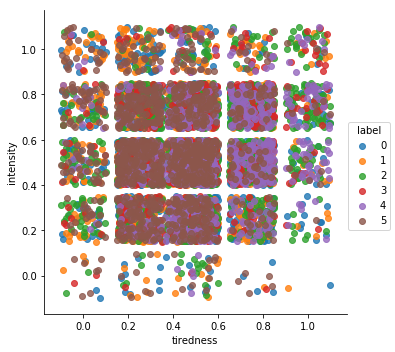

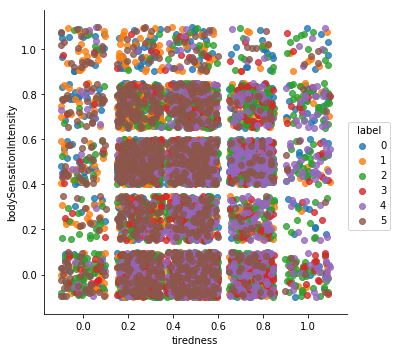

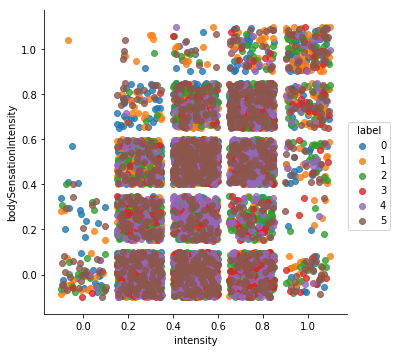

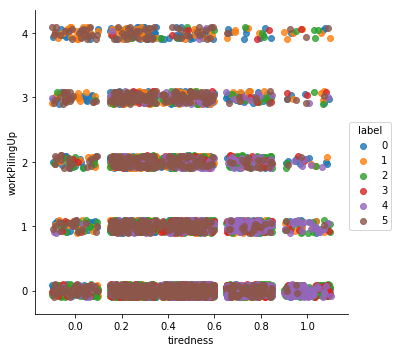

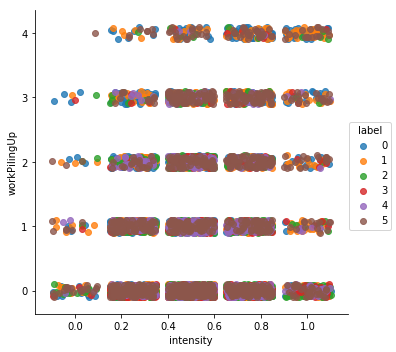

In [245]:
facet = sns.lmplot(data=subset, x='tiredness', y='intensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
facet2 = sns.lmplot(data=subset, x='tiredness', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
# facet3 = sns.lmplot(data=test_subset, x='tiredness', y='emotionDuration', hue='label', 
#                    fit_reg=False, legend=True, legend_out=True, x_jitter=0, y_jitter=0)
facet4 = sns.lmplot(data=subset, x='intensity', y='bodySensationIntensity', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)
facet5 = sns.lmplot(data=subset, x='tiredness', y='workPilingUp', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=.1)
facet6 = sns.lmplot(data=subset, x='intensity', y='workPilingUp', hue='label', 
                   fit_reg=False, legend=True, legend_out=True, x_jitter=.1, y_jitter=0.1)

### Swarm Plots

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


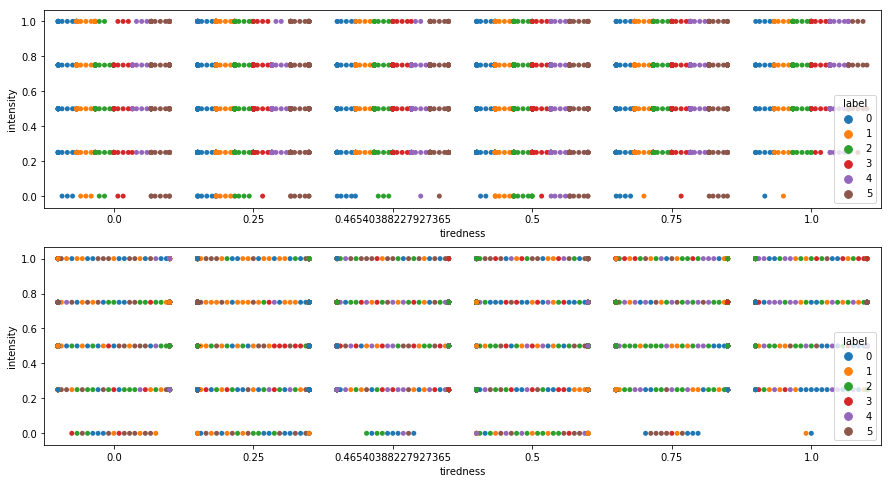

In [246]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
# for i in range(6):
sns.swarmplot(x='tiredness', y='intensity', hue='label', split=True, data=subset, ax=ax[0]);
sns.swarmplot(x='tiredness', y='intensity', hue='label', data=subset, ax=ax[1]);

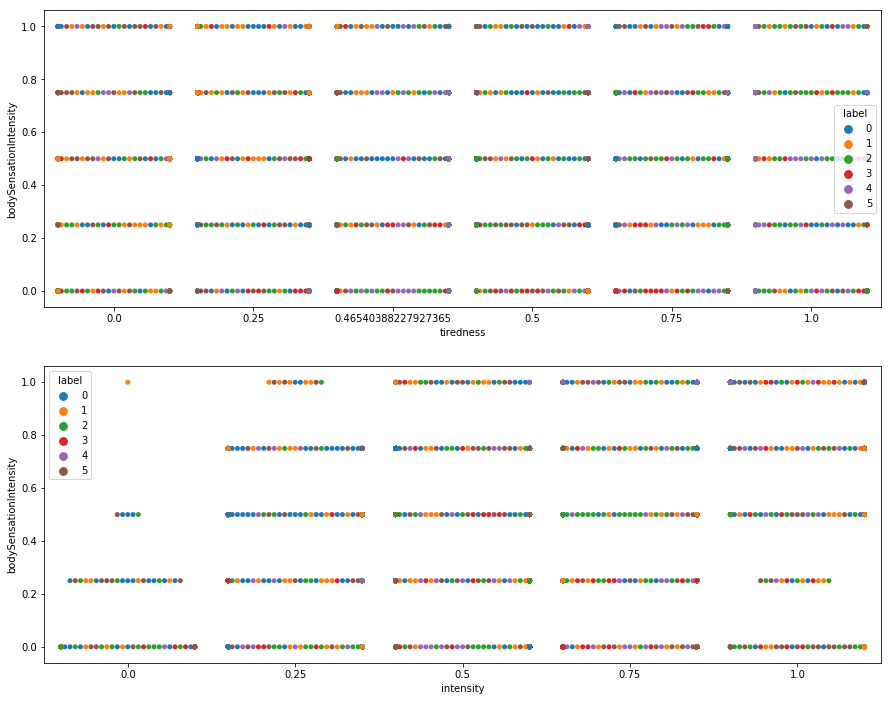

In [247]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
# for i in range(6):
sns.swarmplot(x='tiredness', y='bodySensationIntensity', hue='label', data=subset, ax=ax[0]);
sns.swarmplot(x='intensity', y='bodySensationIntensity', hue='label', data=subset, ax=ax[1]);

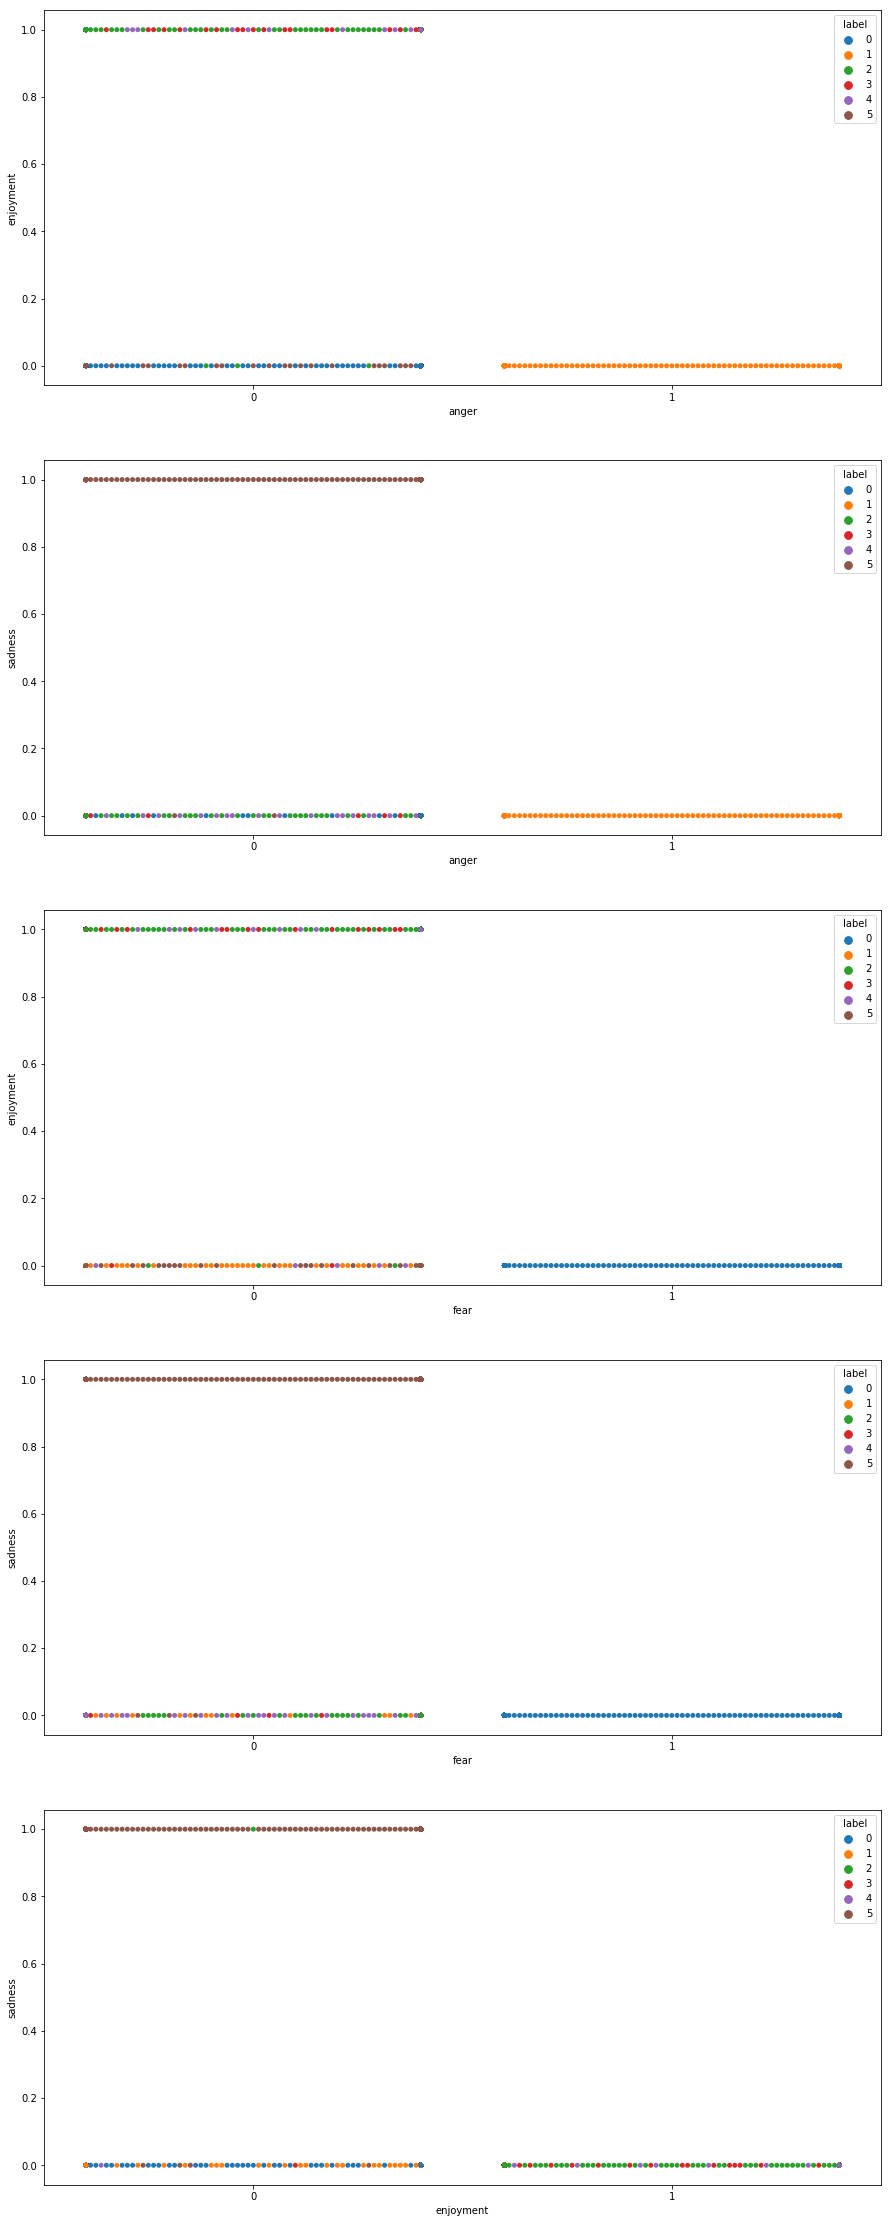

In [250]:
fig, ax = plt.subplots(5, 1, figsize=(15, 40))

emotions1 = ['anger', 'fear', 'enjoyment']
emotions2 = ['enjoyment', 'sadness']
num = 0

for e1 in emotions1:
    for e2 in emotions2:
        if e1 == e2:
            continue
        else:
            sns.swarmplot(x=e1, y=e2, hue='label', data=subset, ax=ax[num]);
            num += 1

# for i in range(6):
#     sns.swarmplot(x='intensity', y='bodySensationIntensity', data=test_subset[predictions == i], ax=ax[i]);

### Radar Charts

In [265]:
# col_list must begin with 'label' category to define clusters

def prep_for_radar(df, col_list):
    df = df[col_list]
    clusters = df.iloc[:, 0].values
    df.drop(['label'], axis=1, inplace=True)
    return df, clusters

In [279]:
cols = ['label', 'anger', 'enjoyment', 'sadness', 'fear', 'intensity']
cols2 = ['label', 'intensity', 'emotionDuration', 'sadness', 'fear', 'enjoyment', 'anger']
cols3 = ['label', 'intensity', 'emotionDuration', 'bodySensationIntensity', 'sadness', 'fear', 'enjoyment', 'anger']
cols4 = ['label', 'tiredness', 'intensity', 'emotionDuration', 'bodySensationIntensity', 'workPilingUp']

In [280]:
df, clusters = prep_for_radar(subset, cols)
df1, clusters1 = prep_for_radar(subset, cols2)
df2, clusters2 = prep_for_radar(subset, cols3)
df3, clusters3 = prep_for_radar(subset, cols4)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [268]:
scaler_radar = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)
scaler.fit(df1)
X1 = scaler.transform(df1)
scaler.fit(df2)
X2 = scaler.transform(df2)

In [281]:
scaler.fit(df3)
X3 = scaler.transform(df3)

In [283]:
np.unique(X3, return_counts=True)

(array([0.        , 0.04494382, 0.15730337, 0.25      , 0.3258427 ,
        0.46540388, 0.5       , 0.66292135, 0.75      , 1.        ]),
 array([7327, 1359, 1468, 6344, 1384, 1038, 8705,  991, 5315, 3199]))

In [172]:
clusters

array([0, 1, 5, ..., 3, 4, 3], dtype=int32)

In [264]:
# function to plot radar graph; modified slightly from Elliot's post (https://medium.com/@Saslow/high-dimensionality-visualization-in-python-65790a4b1719)

def plot_radar(df, X, clusters):
    # number of variable
    categories=list(df)
    N = len(categories)

    #Define the preset angles for your graph
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #Get the mean values on all features from specific cluster
    values = X[clusters == 0].mean(axis = 0)

    #add value to the end so that the fill will work correctly
    values = np.append(values,values[:1])

    #create axis
    ax = plt.subplot(111, polar=True)

    # change the xticks and y ticks
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
    ax.set_rlabel_position(0)

    #Plot the values
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 1')

    # Do it again for other clusters
    values = X[clusters == 1].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 2')

    # Do it again for other clusters
    values = X[clusters == 2].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 3')

    # Do it again for other clusters
    values = X[clusters == 3].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 4')

    # Do it again for other clusters
    values = X[clusters == 4].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 5')

    # And for the last cluster
    values = X[clusters == 5].mean(axis = 0)
    values = np.append(values,values[:1])
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.2,label = 'Cluster 6')

    plt.legend(bbox_to_anchor=(1, 1),
               bbox_transform=plt.gcf().transFigure)
    plt.title('Emotion Clusters on Radar Graph');
    plt.subplots_adjust(hspace=.8)

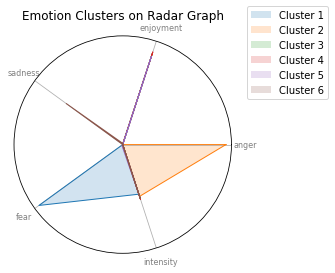

In [276]:
plot_radar(df, X, clusters)

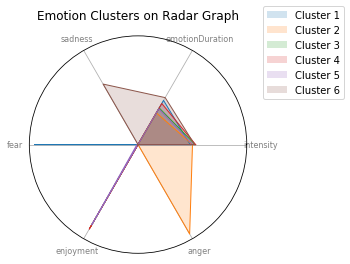

In [277]:
plot_radar(df1, X1, clusters1)

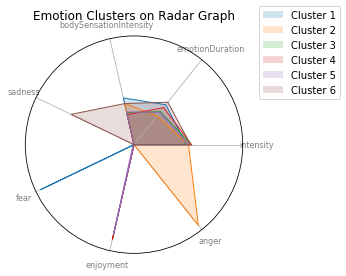

In [278]:
plot_radar(df2, X2, clusters2)